In [2]:
#Author Alex J. Yang, alexjieyang@outlook.com
import numpy as np
import pandas as pd
import itertools
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

In [3]:
# calculate CI using bootstrap
def calculateCI(data,method,n):
    m=int(len(data)/10) #take 10% data
    ms=[]
    for j in range(n): #number of samples
        if method=='mean':
                ms.append(np.mean(np.random.choice(data,m)))
        if method=='median':
                ms.append(np.median(np.random.choice(data,m)))
    a,b=[np.percentile(ms,2.5),np.percentile(ms,97.5)]
    return a,b

In [5]:
df.columns

Index(['PaperID', 'Year', 'Reference_Count', 'Citation_Count', 'C_f', 'C5',
       'Team_Size', 'Institution_Count', 'Country_Count', 'Disruption',
       'Atyp_10pct_Z', 'Atyp_Median_Z', 'nAtyp_10pct_Z', 'nAtyp_Median_Z',
       'nAtyp_10pct_Z_p', 'nAtyp_Median_Z_p', 'Patent_Count', 'Patent',
       'Newsfeed_Count', 'Newsfeed', 'Tweet_Count', 'Tweet', 'NCT_Count',
       'NCT', 'NIH_Count', 'NIH', 'NSF_Count', 'NSF', 'PFemale', '#Page',
       'Title Length', 'RaoStirling', 'SimpsonInterdisciplinarity',
       'ShannonInterdisciplinarity', 'AuthorID', 'JournalID', 'FieldID',
       'Fieldname', 'FieldID2', 'FieldNAME2', 'H-index', 'Productivity'],
      dtype='object')

# c

In [ ]:
df1 = df[df['NIH']==1].copy()
df2 = df[df['NSF']==1].copy()
df3 = df[(df['NIH']==0) & (df['NSF']==0)].copy()

In [8]:
x_pos = [1,2,3,]
colors = ["#196F3D","#1F618D","#212F3D",]

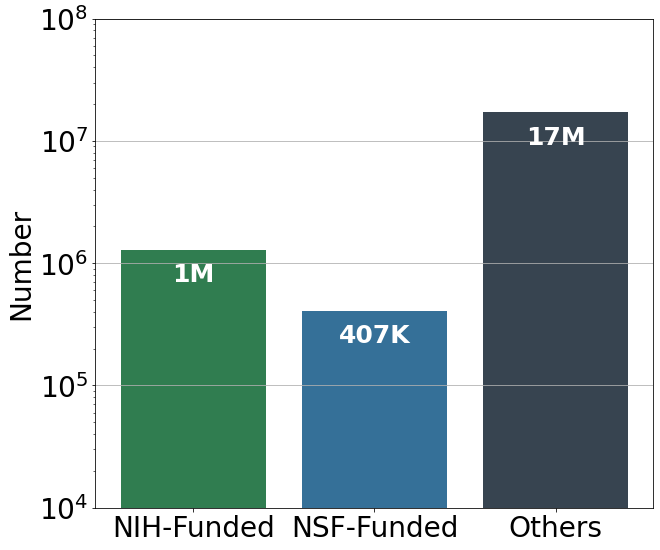

In [13]:
d = [len(df1) , len(df2) , len(df3)]

f, ax = plt.subplots(figsize=(10, 9))
plt.bar(x_pos, d,align='center', color= colors,alpha=0.9,capsize=10)
ax.yaxis.grid(True)
ax.set_yscale("log")
plt.xticks(x_pos,['NIH-Funded' , 'NSF-Funded','Others' , ],fontsize = 28)
for _ in range(len(d)):
    if d[_]>1000000:
        plt.text(x_pos[_],d[_]*0.55 , str(d[_]//1000000)+'M',fontsize = 25,c = 'white', ha='center', fontweight='bold')
    else:
        plt.text(x_pos[_],d[_]*0.55 , str(d[_]//1000)+'K',fontsize = 25,c = 'white', ha='center', fontweight='bold')
plt.yticks([10e3,10e4,10e5,10e6,10e7],size = 28)
plt.ylabel(r'Number',fontsize = 28)

# d

In [21]:
year = range(2000,2016)
y0 = df ['C5'].groupby(df['Year']).count().values
y1 = df1['C5'].groupby(df1['Year']).count().values
y2 = df2['C5'].groupby(df2['Year']).count().values
y3 = df3['C5'].groupby(df3['Year']).count().values

In [16]:
markers = ['o','^','D']
labels = ['NIH-Funded' , 'NSF-Funded','Others' , ]

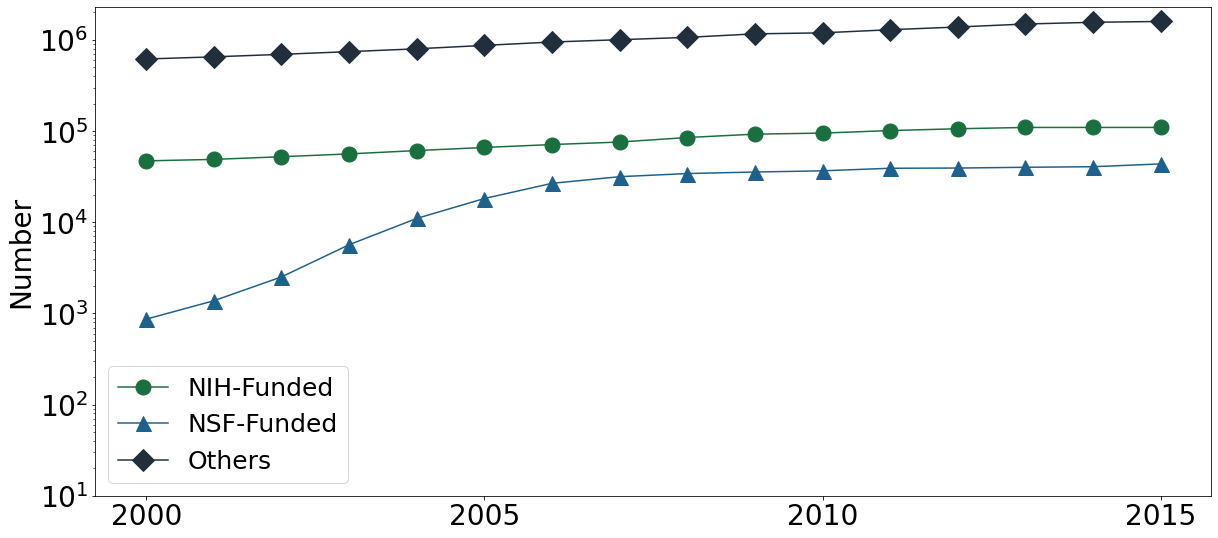

In [39]:
f, ax = plt.subplots(figsize=(20, 9))
for i in range(3):
    y = [y1,y2,y3][i]
    plt.plot(year , y , marker = markers[i], markersize = 15, label=labels[i], color=colors[i])
ax.set_yscale("log")
plt.legend(fontsize = 25 , loc = 'lower left')
plt.xticks([2000,2005,2010,2015],size = 28)
plt.yticks([10,100,1000,10000,100000,1000000],size = 28)
plt.ylabel(r'Number',fontsize = 28)

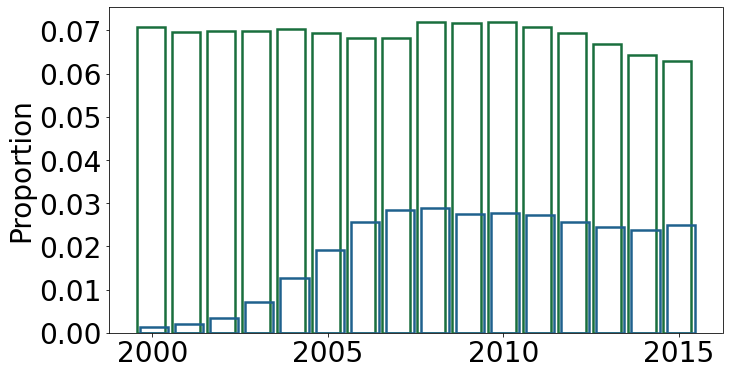

In [38]:
year = np.array(range(2000,2016))
y10 = y1/y0
y20 = y2/y0
f, ax = plt.subplots(figsize=(11, 6))
plt.bar(year-.05 , y10 ,linewidth = 2.5,fill = False, edgecolor=colors[0],)
plt.bar(year+.05 , y20 ,linewidth = 2.5,fill = False, edgecolor=colors[1],)
# plt.legend(fontsize = 25 , loc = 'lower right')
plt.xticks([2000,2005,2010,2015],size = 28)
plt.yticks(size = 28)
plt.ylabel(r'Proportion',fontsize = 28)

# a

In [42]:
dfField

,FieldID,Field_Name,Field_Type
8,95457728,History,Top
11,127313418,Geology,Top
29,162324750,Economics,Top
53,205649164,Geography,Top
76,185592680,Chemistry,Top
83,138885662,Philosophy,Top
86,144024400,Sociology,Top
87,192562407,Materials science,Top
96,33923547,Mathematics,Top
107,86803240,Biology,Top


In [43]:
Fieldlst = dfField['FieldID'].values

In [44]:
data1 = []
data2 = []
year = range(2000,2016)
for Field in Fieldlst:
    df0 = df.loc[df['FieldID'] == Field,:].copy()
    y0 = df0['NIH'].groupby(df0['Year']).count().values
    y1 = df0['NIH'].groupby(df0['Year']).sum().values
    y2 = df0['NSF'].groupby(df0['Year']).sum().values
    y10 = y1/y0
    y20 = y2/y0
    data1.append(y10)
    data2.append(y20)

In [53]:
dd1 = pd.DataFrame(data1 , columns=year , index = dfField['Field_Name'].values)
dd2 = pd.DataFrame(data2 , columns=year , index = dfField['Field_Name'].values)
dd1 = dd1*100
dd2 = dd2*100

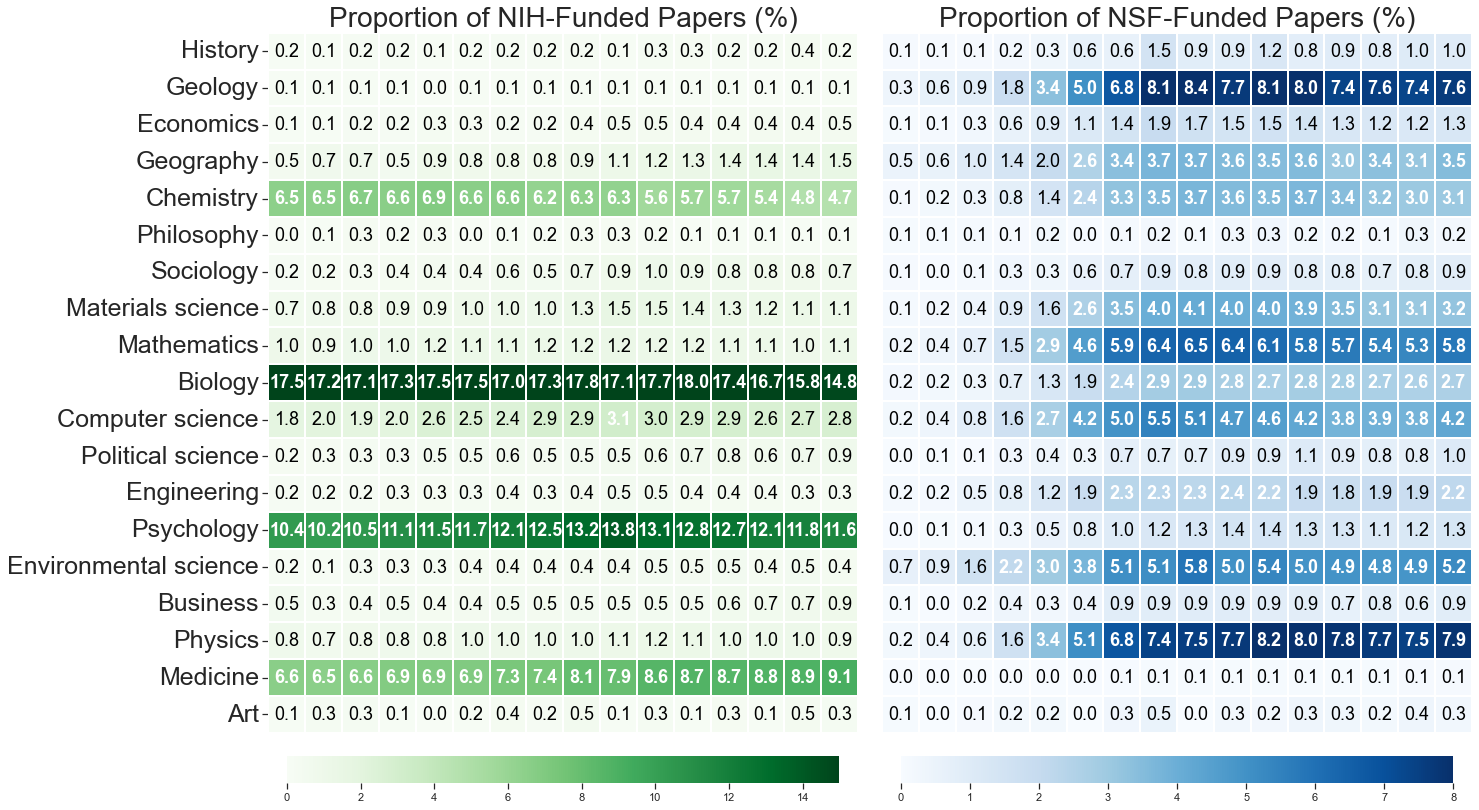

In [110]:
plt.subplots(1,2,figsize=(22,14))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0,hspace=0)
sns.set_theme(style="ticks")

ax = plt.subplot(1,2, 1)
ax.set_title("Proportion of NIH-Funded Papers (%)", fontsize=28)
cmap = sns.color_palette('Greens', as_cmap=True)
heatmap = sns.heatmap(data=dd1, cmap=cmap, vmin=0, vmax=15,
                      square=True, linewidths=1.5, cbar_kws={"shrink": .9,"location":"bottom",'fraction':.05,"pad":.03,})
ax.tick_params(labelsize=25)
heatmap.set_xticks([])
# Add data labels
for i in range(len(dd1)):
    for j in range(len(dd1.columns)):
        if dd1.iloc[i, j]<3:
            text = ax.text(j + 0.5, i + 0.5, round(dd1.iloc[i, j], 1),
                           ha="center", va="center", color="black", fontsize=18)
        else:
            text = ax.text(j + 0.5, i + 0.5, round(dd1.iloc[i, j], 1),
                           ha="center", va="center", color="white", fontsize=18, fontweight='bold')


ax = plt.subplot(1,2, 2)
ax.set_title("Proportion of NSF-Funded Papers (%)", fontsize=28)
cmap = sns.color_palette('Blues', as_cmap=True)
heatmap = sns.heatmap(data=dd2, cmap=cmap, vmin=0, vmax=8,
                      square=True, linewidths=1.5, cbar_kws={"shrink": .9,"location":"bottom",'fraction':.05,"pad":.03,})
ax.tick_params(labelsize=25)
heatmap.set_yticks([])
heatmap.set_xticks([])
# Add data labels
for i in range(len(dd2)):
    for j in range(len(dd2.columns)):
        if dd2.iloc[i, j]<2:
            text = ax.text(j + 0.5, i + 0.5, round(dd2.iloc[i, j], 1),
                           ha="center", va="center", color="black", fontsize=18)
        else:
            text = ax.text(j + 0.5, i + 0.5, round(dd2.iloc[i, j], 1),
                           ha="center", va="center", color="white", fontsize=18, fontweight='bold')